# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ppscore as pps
import seaborn as sns


In [3]:
df1 = pd.read_csv('ideb.csv')
df2 = pd.read_csv('pib.csv')

In [4]:
ideb = df1[['ano', 'id_municipio', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
pib = df2[['id_municipio','ano','pib', 'impostos_liquidos']]

In [5]:
pib.head(3)

,id_municipio,ano,pib,impostos_liquidos
0,1100015,2002,111290995,7549266
1,1100023,2002,449592816,42665972
2,1100031,2002,31767520,1867935


### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [6]:
ideb_2019 = ideb.loc[ideb['ano'] == 2019]
ideb_2019_group = ideb_2019.groupby('id_municipio').mean()

ideb_2019_group.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,,
1100015,2019.0,253.283750,242.246250,5.050000
1100023,2019.0,248.223750,243.618750,4.762500
1100031,2019.0,229.495000,221.500000,4.850000
1100049,2019.0,259.150000,249.888889,5.200000
1100056,2019.0,266.288571,254.334286,5.642857


In [8]:
# seu código

### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [7]:
pib_2019 = pib.loc[pib['ano'] == 2019]
pib_2019_group = pib_2019.groupby('id_municipio').mean()

pib_2019_group.head()

,ano,pib,impostos_liquidos
id_municipio,,,
1100015,2019.0,4.956288e+08,29350985.0
1100023,2019.0,2.578830e+09,284397627.0
1100031,2019.0,1.399594e+08,5997974.0
1100049,2019.0,2.260644e+09,253988284.0
1100056,2019.0,5.068545e+08,76671376.0


In [10]:
# seu código

### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [8]:
result = pd.merge(ideb_2019_group, pib_2019_group, how="inner", on="id_municipio")

result.head()

,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano_y,pib,impostos_liquidos
id_municipio,,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,2019.0,4.956288e+08,29350985.0
1100023,2019.0,248.223750,243.618750,4.762500,2019.0,2.578830e+09,284397627.0
1100031,2019.0,229.495000,221.500000,4.850000,2019.0,1.399594e+08,5997974.0
1100049,2019.0,259.150000,249.888889,5.200000,2019.0,2.260644e+09,253988284.0
1100056,2019.0,266.288571,254.334286,5.642857,2019.0,5.068545e+08,76671376.0


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 1100015 to 5300108
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano_x                        5570 non-null   float64
 1   nota_saeb_matematica         5549 non-null   float64
 2   nota_saeb_lingua_portuguesa  5549 non-null   float64
 3   ideb                         5549 non-null   float64
 4   ano_y                        5570 non-null   float64
 5   pib                          5570 non-null   float64
 6   impostos_liquidos            5570 non-null   float64
dtypes: float64(7)
memory usage: 348.1 KB


In [10]:
df = result[['nota_saeb_matematica','nota_saeb_lingua_portuguesa', 'ideb', 'pib', 'impostos_liquidos']].dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5549 entries, 1100015 to 5300108
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nota_saeb_matematica         5549 non-null   float64
 1   nota_saeb_lingua_portuguesa  5549 non-null   float64
 2   ideb                         5549 non-null   float64
 3   pib                          5549 non-null   float64
 4   impostos_liquidos            5549 non-null   float64
dtypes: float64(5)
memory usage: 260.1 KB


### Atividade 5: Quais são os tipos das variáveis do DataFrame?

todas float

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [12]:
df.corr()

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
nota_saeb_matematica,1.000000,0.960775,0.788224,0.043748,0.039766
nota_saeb_lingua_portuguesa,0.960775,1.000000,0.725772,0.056341,0.050434
ideb,0.788224,0.725772,1.000000,0.037105,0.036383
pib,0.043748,0.056341,0.037105,1.000000,0.981030
impostos_liquidos,0.039766,0.050434,0.036383,0.981030,1.000000


In [13]:
df[['pib', 'ideb']].corr()

,pib,ideb
pib,1.000000,0.037105
ideb,0.037105,1.000000


<Axes: xlabel='x', ylabel='y'>

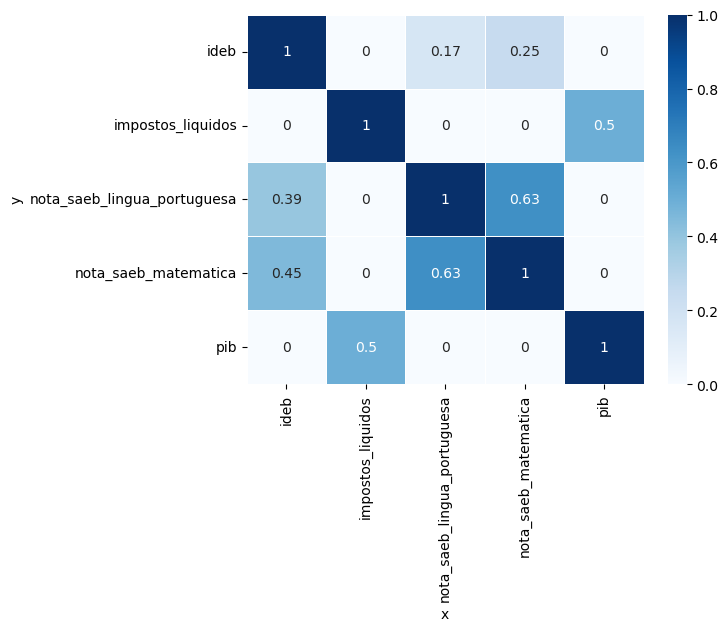

In [14]:
matrix_df = pps.matrix(df)

import seaborn as sns
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

### O que significa a correlação das variáveis `id_municipio` e `ideb`?

Correlaçao Espúria

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

In [15]:
seguranca_rio = pd.read_csv('seg_rj.csv')

seguranca_rio.head()

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,...,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,...,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,...,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0


In [16]:
seguranca_rio.corr(method='spearman')

C:\Users\99769242\AppData\Local\Temp\ipykernel_6800\1939127980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seguranca_rio.corr(method='spearman')


,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,1.000000,-0.039640,-0.794997,-0.182688,-0.433580,-0.792489,-0.008083,-0.683444,0.419777,-0.605552,...,0.365211,0.451421,-0.436808,-0.190954,-0.848485,-0.224156,0.024228,0.163659,0.439859,-0.197525
mes,-0.039640,1.000000,-0.127381,-0.029673,-0.042646,-0.122955,-0.131089,-0.157678,-0.111790,-0.020612,...,0.121727,-0.004108,-0.051777,-0.009800,-0.144176,0.041454,-0.057891,0.080015,-0.020097,0.046734
hom_doloso,-0.794997,-0.127381,1.000000,0.278659,0.602589,0.998617,0.227061,0.938888,-0.074373,0.439327,...,-0.429450,-0.129023,0.199766,0.075089,0.771263,0.109701,0.202137,-0.101718,-0.283577,0.191467
lesao_corp_morte,-0.182688,-0.029673,0.278659,1.000000,0.187286,0.294053,0.254990,0.340909,-0.018490,0.029415,...,-0.194238,-0.001662,-0.092447,-0.064317,0.193709,-0.042204,0.117483,-0.218406,-0.105568,-0.004715
latrocinio,-0.433580,-0.042646,0.602589,0.187286,1.000000,0.633127,0.126139,0.587096,0.044404,0.172995,...,-0.172835,0.013662,0.020468,0.081481,0.408382,0.021470,0.038552,-0.087784,-0.024232,0.188828
cvli,-0.792489,-0.122955,0.998617,0.294053,0.633127,1.000000,0.229438,0.940526,-0.074098,0.430536,...,-0.427027,-0.124805,0.188524,0.071023,0.767163,0.103854,0.200591,-0.109337,-0.281478,0.192077
hom_por_interv_policial,-0.008083,-0.131089,0.227061,0.254990,0.126139,0.229438,1.000000,0.529131,-0.060869,-0.438805,...,-0.368168,0.181322,-0.584047,-0.567050,0.021605,0.002970,0.141050,0.023824,-0.331946,-0.083722
letalidade_violenta,-0.683444,-0.157678,0.938888,0.340909,0.587096,0.940526,0.529131,1.000000,-0.070437,0.225388,...,-0.490651,0.003789,-0.034444,-0.127541,0.668729,0.086651,0.235289,-0.104029,-0.342171,0.165897
tentat_hom,0.419777,-0.111790,-0.074373,-0.018490,0.044404,-0.074098,-0.060869,-0.070437,1.000000,-0.027126,...,0.442030,0.575950,0.051438,0.291901,-0.207211,-0.117285,0.194882,-0.084723,0.702333,0.168033
lesao_corp_dolosa,-0.605552,-0.020612,0.439327,0.029415,0.172995,0.430536,-0.438805,0.225388,-0.027126,1.000000,...,0.000117,-0.291923,0.890175,0.651756,0.595812,0.104105,-0.006000,-0.232360,0.090855,0.191462


In [19]:
c = seguranca_rio.corr(method='spearman').abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)

so[so < 1].head(50)

C:\Users\99769242\AppData\Local\Temp\ipykernel_6800\3811314224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = seguranca_rio.corr(method='spearman').abs()


cvli                 hom_doloso             0.998617
hom_doloso           cvli                   0.998617
roubo_rua            roubo_transeunte       0.969417
roubo_transeunte     roubo_rua              0.969417
trafico_drogas       apreensao_drogas       0.950458
apreensao_drogas     trafico_drogas         0.950458
                     posse_drogas           0.948490
posse_drogas         apreensao_drogas       0.948490
apf                  trafico_drogas         0.944754
trafico_drogas       apf                    0.944754
cvli                 letalidade_violenta    0.940526
letalidade_violenta  cvli                   0.940526
                     hom_doloso             0.938888
hom_doloso           letalidade_violenta    0.938888
furto_transeunte     total_furtos           0.935934
total_furtos         furto_transeunte       0.935934
apreensao_drogas     apf                    0.913383
apf                  apreensao_drogas       0.913383
lesao_corp_dolosa    ameaca                 0.

### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [20]:
seg_rj = seguranca_rio.loc[seguranca_rio['ano'] == 2020]

seg_rj_2020 = seg_rj[['mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
                      'hom_por_interv_policial', 'trafico_drogas']]

seg_rj_2020.head()


,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,1,2.07,0.02,0.05,2.14,0.90,5.06
205,2,1.88,0.01,0.06,1.95,0.95,5.06
206,3,2.16,0.01,0.05,2.22,0.66,4.70
207,4,1.80,0.03,0.03,1.86,1.03,5.29
208,5,1.57,0.00,0.03,1.61,0.75,5.39


In [21]:
seg_rj_2020.corr()

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
mes,1.000000,-0.566207,-0.015898,-0.023600,-0.564683,-0.545311,-0.177466
hom_doloso,-0.566207,1.000000,0.034585,0.328911,0.998618,0.611633,-0.357176
lesao_corp_morte,-0.015898,0.034585,1.000000,-0.017885,0.052932,0.122699,0.037087
latrocinio,-0.023600,0.328911,-0.017885,1.000000,0.372951,0.053913,0.006117
cvli,-0.564683,0.998618,0.052932,0.372951,1.000000,0.605511,-0.344443
hom_por_interv_policial,-0.545311,0.611633,0.122699,0.053913,0.605511,1.000000,0.336126
trafico_drogas,-0.177466,-0.357176,0.037087,0.006117,-0.344443,0.336126,1.000000


In [23]:
c = seg_rj_2020.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)

so[so < 1].head(20)

hom_doloso               cvli                       0.998618
cvli                     hom_doloso                 0.998618
hom_doloso               hom_por_interv_policial    0.611633
hom_por_interv_policial  hom_doloso                 0.611633
                         cvli                       0.605511
cvli                     hom_por_interv_policial    0.605511
hom_doloso               mes                        0.566207
mes                      hom_doloso                 0.566207
                         cvli                       0.564683
cvli                     mes                        0.564683
mes                      hom_por_interv_policial    0.545311
hom_por_interv_policial  mes                        0.545311
latrocinio               cvli                       0.372951
cvli                     latrocinio                 0.372951
hom_doloso               trafico_drogas             0.357176
trafico_drogas           hom_doloso                 0.357176
                        

In [24]:
X = seg_rj_2020.copy()
y = X.pop("trafico_drogas")

In [25]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[:3]  # show a few features with their MI scores

latrocinio    0.069613
hom_doloso    0.036974
mes           0.000000
Name: MI Scores, dtype: float64

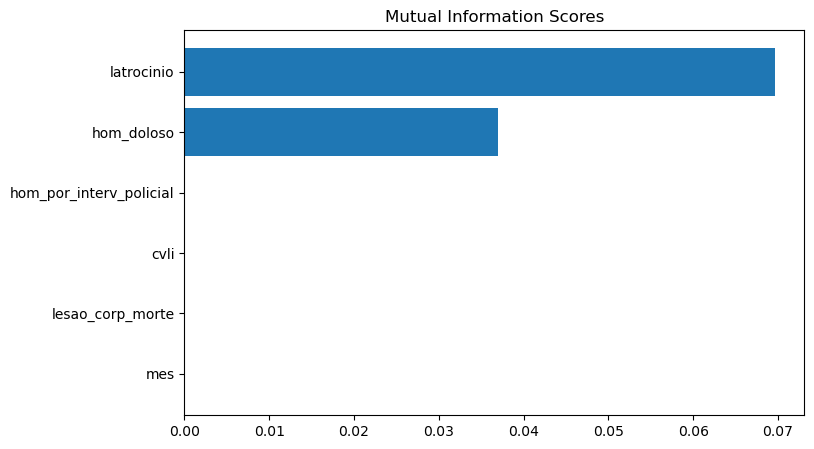

In [26]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

https://github.com/8080labs/ppscore

<Axes: xlabel='x', ylabel='y'>

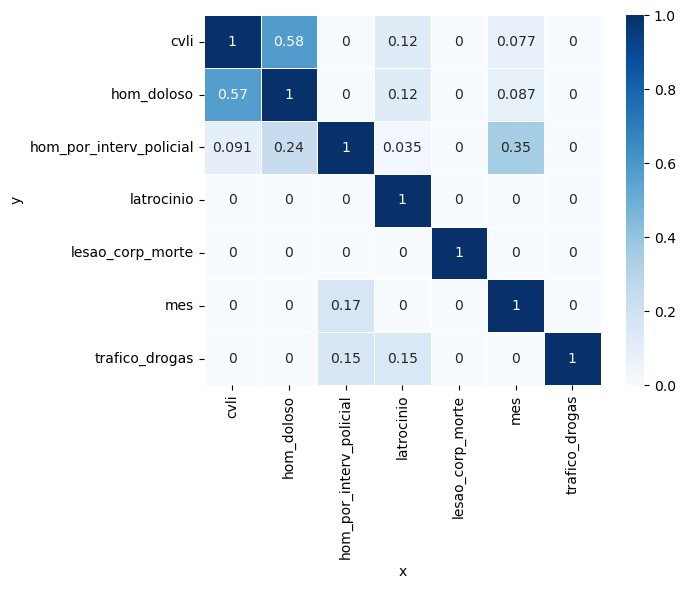

In [27]:
matrix_seg_rj = pps.matrix(seg_rj_2020)

matrix_df = pps.matrix(seg_rj_2020)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)